## IMPORT LIBRARIES

In [1]:
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib
import random
import csv
!pip install seaborn
!pip install scikit-learn
import seaborn as sns
import numpy as np
sns.set_theme(style="ticks", color_codes=True)

     |████████████████████████████████| 10.3 MB 5.0 MB/s eta 0:00:01    |████████████▍                   | 4.0 MB 5.0 MB/s eta 0:00:02     |███████████████████████████████▋| 10.2 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 13.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 27.3 MB 21.5 MB/s eta 0:00:01
     |████████████████████████████████| 23.8 MB 13.0 MB/s eta 0:00:01   |██████▌                         | 4.9 MB 4.5 MB/s eta 0:00:05     |███████████▌                    | 8.6 MB 4.5 MB/s eta 0:00:04     |█████████████▏                  | 9.8 MB 4.5 MB/s eta 0:00:04     |█████████████████               | 12.6 MB 13.0 MB/s eta 0:00:01     |██████████████████████████▌     | 19.7 MB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 10.2 MB/s eta 0:00:01


# Set up jupyter notebooks

In [192]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load the Dataset

In [309]:
df = pd.read_csv("/data/projects/car-insurance/data/Train_data.csv").drop(columns=["default_or_not"])
df.head(50)

,age,job_type,marital_status,education_level,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1
5,37.000000,management,married,tertiary,3737.000000,0,0,cellular,7,jul,1,-1,0,NaN,10:15:03,10:18:47,1
6,30.000000,blue-collar,married,secondary,1.000000,0,1,cellular,9,jul,1,-1,0,NaN,10:51:56,10:57:43,0
7,21.000000,student,single,primary,1596.000000,0,0,cellular,26,aug,1,93,2,failure,10:10:32,10:12:27,0
8,52.091704,admin.,married,secondary,101.453662,0,0,cellular,21,aug,3,-1,0,NaN,16:42:19,16:52:35,1
9,49.000000,technician,married,secondary,412.000000,0,0,cellular,19,aug,8,-1,0,NaN,15:33:44,15:55:17,1


# Exploratory Data Analysis (EDA)

In [270]:
# note to self for future, bad practice to use number when using df.iterrows() because if I drop a table it will no longer work. 
# I can always just use the name of the column. 
num_customers = len(df)
print(f"The size of the dataset {num_customers}")
jobs = {row[1] for _, row in df.iterrows()}
print(f"The jobs {jobs}")
marital_statuses = {row[2] for _, row in df.iterrows()}
print(f"The marital status {marital_statuses}")
edu_levels = {row[3] for _, row in df.iterrows()}
print(f"The education levels {edu_levels}")
print(f"The minimum balance of a customer={min(df['balance_amt'])}")
print(f"The maximum balance of a customer={max(df['balance_amt'])}")
num_household_insurance = len([row[5] for _, row in df.iterrows() if row[6]==1])
print(f"The number of customers with household insurance={num_household_insurance}")
num_car_loans = len([row[6] for _, row in df.iterrows() if row[7]==1])
print(f"The number of customers with car loans = {num_car_loans}")
comm_methods = {row[7] for _, row in df.iterrows()}
print(f"The communication methods {comm_methods}")
print(f"the number of customers using telephone = {len([row[7] for _, row in df.iterrows() if row[7]=='telephone'])}")
print(f"The maximum number of contacts = {max(df['no_of_contacts'])}")
print(f"The minimum number of contacts = {min(df['no_of_contacts'])}")
print(f"The maximum number of days of previous contact = {max(df['days_passed'])}")
print(f"The maximum number of previous attempts = {max(df['prev_attempts'])}")
outcomes = {row[13] for _, row in df.iterrows()}
print(f"The outcomes = {outcomes}")
num_yes = len([row[16] for _, row in df.iterrows() if row[16]==1])
num_no = len([row[16] for _, row in df.iterrows() if row[16]==0])
print(f"The number of customers that said yes = {num_yes}, and no = {num_no}")
print(f"The number of customers that are in management {len([row[1] for _, row in df.iterrows() if row[1]=='management'])}")
print(f"The number of management to purchase car insurance = {len([row[1] for _, row in df.iterrows() if row[1]=='management' and row['car_insurance']==1])}")

The size of the dataset 3102
The jobs {nan, 'technician', 'retired', 'unemployed', 'management', 'entrepreneur', 'housemaid', 'self-employed', 'admin.', 'student', 'blue-collar', 'services'}
The marital status {'married', 'single', 'divorced'}
The education levels {nan, 'tertiary', 'secondary', 'primary'}
The minimum balance of a customer=-3058.0
The maximum balance of a customer=52587.0
The number of customers with household insurance=355
The number of customers with car loans = 0
The communication methods {nan, 'cellular', 'telephone'}
the number of customers using telephone = 162
The maximum number of contacts = 43
The minimum number of contacts = 1
The maximum number of days of previous contact = 854
The maximum number of previous attempts = 58
The outcomes = {nan, 'other', 'failure', 'success'}
The number of customers that said yes = 1760, and no = 1342
The number of customers that are in management 724
The number of management to purchase car insurance = 453


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   balance_amt          3102 non-null   float64
 5   household_insurance  3102 non-null   int64  
 6   car_loan             3102 non-null   int64  
 7   communication        2559 non-null   object 
 8   last_contact_day     3102 non-null   int64  
 9   last_contact_month   3102 non-null   object 
 10  no_of_contacts       3102 non-null   int64  
 11  days_passed          3102 non-null   int64  
 12  prev_attempts        3102 non-null   int64  
 13  Outcome              751 non-null    object 
 14  call_start           3102 non-null   object 
 15  call_end             3102 non-null   o

## Data cleaning for dropping some columns

In [310]:
df_calls = df
df = df.drop(columns=["communication", "last_contact_day", "last_contact_month", "days_passed", "call_start", "call_end", "no_of_contacts", "prev_attempts"])

## Analyze the call times in the model 

In [311]:
df_calls.drop(inplace=True, columns=["last_contact_month", "no_of_contacts", "days_passed", "last_contact_day", "communication", "car_loan", "balance_amt", "education_level", "marital_status", "job_type", "prev_attempts"])
df_calls.head()

,age,household_insurance,Outcome,call_start,call_end,car_insurance
0,47.000000,1,NaN,10:22:20,10:24:29,0
1,46.031442,0,other,09:06:30,13:59:48,1
2,36.000000,1,NaN,13:18:41,13:27:16,1
3,32.000000,0,NaN,10:09:18,10:21:48,1
4,30.000000,1,failure,12:12:30,12:27:14,1


## Notebook API

In [357]:
def loadData(file):
    return pd.read_csv(f"/data/projects/car-insurance/data/{file}")

def dropColumns(df):
    df.drop(inplace=True, columns=["default_or_not", "last_contact_month", "no_of_contacts", "days_passed", "last_contact_day", "communication", "car_loan", "balance_amt", "education_level", "marital_status", "job_type", "prev_attempts"])

def getSeconds(time):
    return 3600*int(time[0])+60*int(time[1])+int(time[2])
    
def duration(start, end):
    slst = start.split(':')
    elst = end.split(':')
    ss = getSeconds(slst)
    ee = getSeconds(elst)
    dur = ee-ss
    if dur<0:
        return dur+3600*24
    return dur

# Inserts the call duration into the dataframe inplace
def insertCallDur(df):
    call_duration = [duration(row['call_start'], row['call_end']) for _, row in df.iterrows()]
    df.drop(inplace=True, columns=['call_start', 'call_end'])
    df.insert(3,'duration', call_duration)
    
def dataProcess(df):
    df.loc[(df.Outcome=="success"), "Outcome"] = 1
    df.loc[(df.Outcome=="other") | (df.Outcome.isna()), "Outcome"] = 0
    df.loc[(df.Outcome=="failure"), "Outcome"] = -1

def createDataFrame(file):
    df = loadData(file)
    # Part of the data cleanup, removing columns
    dropColumns(df)
    # Part of preprocessing the data, finding the duration
    insertCallDur(df)
    # More data processing, this time setting outcome from string to numerical values.
    dataProcess(df)
    return df
def savePredictionsv1(preds, name):
    with open(f"/data/projects/car-insurance/data/{name}", "w") as csv_file:
        fieldnames = ["prediction"]
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for i, pred in enumerate(target):
            writer.writerow({"prediction": str(pred)})
            
def savePredictionsv2(preds, name, outcomes):
    with open(f"/data/projects/car-insurance/data/{name}", "w") as csv_file:
        fieldnames = ["prediction"]
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for i, pred in enumerate(target):
            if outcomes[i]==1:
                writer.writerow({"prediction": str(1)})
            else:
                writer.writerow({"prediction": str(pred)})

In [326]:
df_calls.drop(inplace=True, columns=['call_start', 'call_end'])
print(f"count number of times the phone call was over 5 hours {len([row.duration for _, row in df_calls.iterrows() if row.duration>1000])}")
df_table = df_calls[df_calls['duration']>1000]
print(f"Those who purchased insurance with long phone calls {len([row.car_insurance for _, row in df_table.iterrows() if row.car_insurance==1])}")

count number of times the phone call was over 5 hours 669
Those who purchased insurance with long phone calls 657


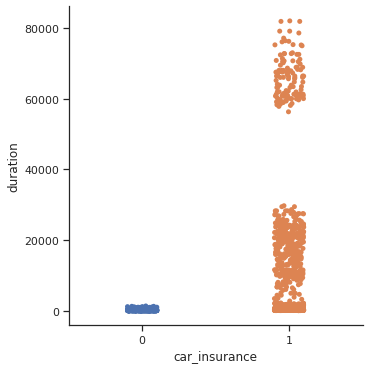

In [321]:
sns.catplot(x='car_insurance', y='duration', data=df_calls)

## Set up the plots backend

In [205]:
%matplotlib inline
print(matplotlib.__version__)

3.4.1


## Explore hexagonal bin plots

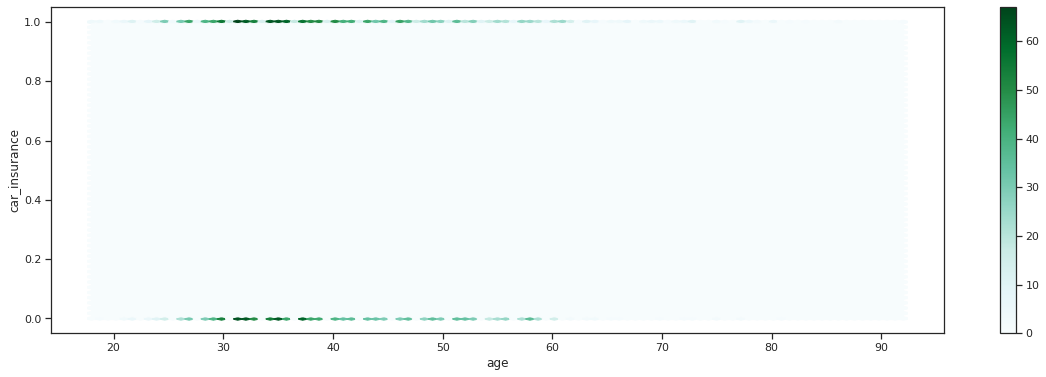

In [175]:
df.plot(x="age", y="car_insurance", kind="hexbin",figsize=(20,6),gridsize=100,sharex=False)
plt.show()

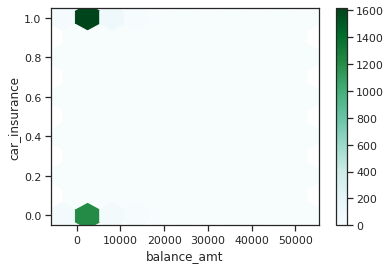

In [176]:
df.plot(x="balance_amt", y="car_insurance", kind="hexbin", gridsize=10,sharex=False)
plt.show()

## Categorical scatterplots

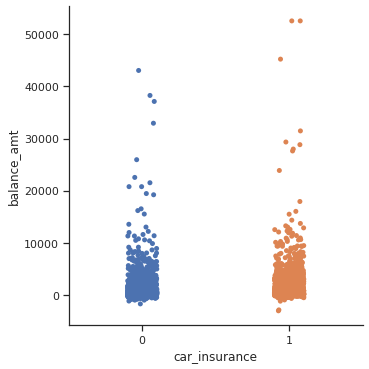

In [322]:
sns.catplot(x="car_insurance", y="balance_amt", data=df)

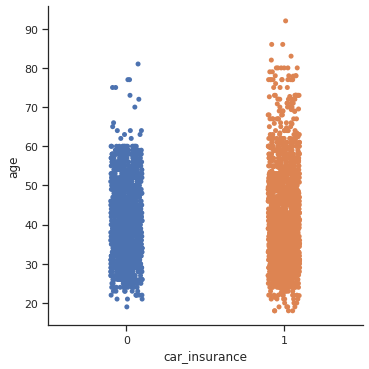

In [323]:
sns.catplot(x="car_insurance", y="age", data=df)

## Stacked bar plots

## education 

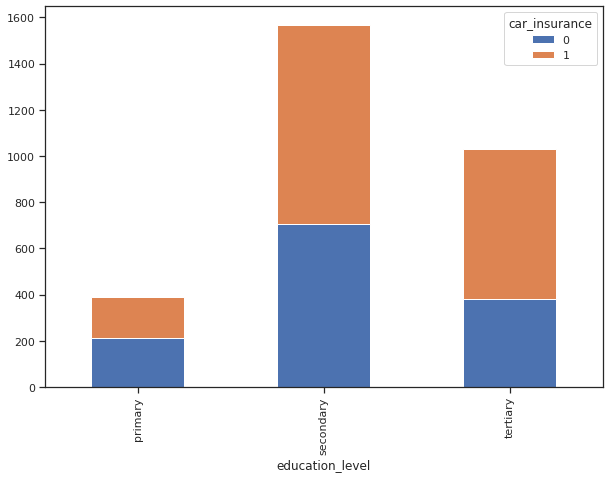

In [179]:
cnt_yes_primary = len(df.loc[(df.education_level == "primary") & (df.car_insurance==1)]) 
cnt_no_primary = len(df.loc[(df.education_level == "primary") & (df.car_insurance==0)]) 
cnt_yes_secondary = len(df.loc[(df.education_level == "secondary") & (df.car_insurance==1)]) 
cnt_no_secondary = len(df.loc[(df.education_level == "secondary") & (df.car_insurance==0)]) 
cnt_yes_tertiary = len(df.loc[(df.education_level == "tertiary") & (df.car_insurance==1)]) 
cnt_no_tertiary = len(df.loc[(df.education_level == "tertiary") & (df.car_insurance==0)]) 
values = [cnt_yes_primary, cnt_no_primary, cnt_yes_secondary, cnt_no_secondary, cnt_yes_tertiary, cnt_no_tertiary]
educations = ["primary", "primary", "secondary", "secondary","tertiary", "tertiary"]
insurance = [1, 0, 1, 0, 1, 0]
rows = zip(educations, insurance, values)
columns = ["education_level", "car_insurance", "counts"]
df_edu = pd.DataFrame(rows,columns=columns)
df_edu_pivot = df_edu.pivot(index="education_level",columns="car_insurance", values="counts")
# why does this work haha?  why do I need to use loc to be able to get the bar graph to work??? 
df_edu_pivot.loc[:, [0,1]].plot(kind="bar", stacked=True, figsize=(10,7))
plt.show()

##  marital status

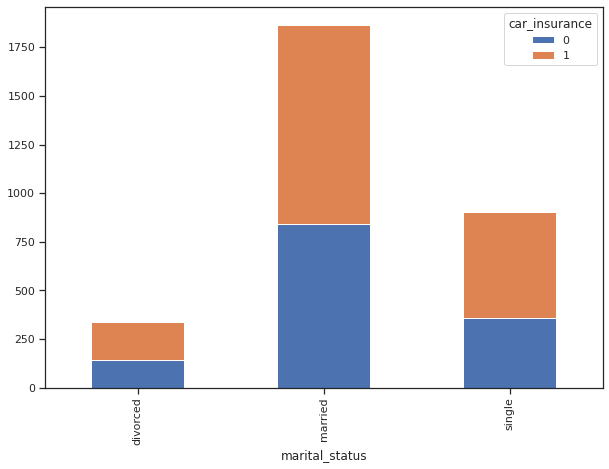

In [180]:
cnt_yes_single = len(df.loc[(df.marital_status == "single") & (df.car_insurance==1)]) 
cnt_no_single = len(df.loc[(df.marital_status == "single") & (df.car_insurance==0)]) 
cnt_yes_married = len(df.loc[(df.marital_status == "married") & (df.car_insurance==1)]) 
cnt_no_married = len(df.loc[(df.marital_status == "married") & (df.car_insurance==0)]) 
cnt_yes_divorced = len(df.loc[(df.marital_status == "divorced") & (df.car_insurance==1)]) 
cnt_no_divorced = len(df.loc[(df.marital_status == "divorced") & (df.car_insurance==0)]) 
values = [cnt_yes_single, cnt_no_single, cnt_yes_married, cnt_no_married, cnt_yes_divorced, cnt_no_divorced]
educations = ["single", "single", "married", "married","divorced", "divorced"]
insurance = [1, 0, 1, 0, 1, 0]
rows = zip(educations, insurance, values)
columns = ["marital_status", "car_insurance", "counts"]
df_edu = pd.DataFrame(rows,columns=columns)
df_edu_pivot = df_edu.pivot(index="marital_status",columns="car_insurance", values="counts")
# why does this work haha?  why do I need to use loc to be able to get the bar graph to work??? 
df_edu_pivot.loc[:, [0,1]].plot(kind="bar", stacked=True, figsize=(10,7))
plt.show()

## household_insurance

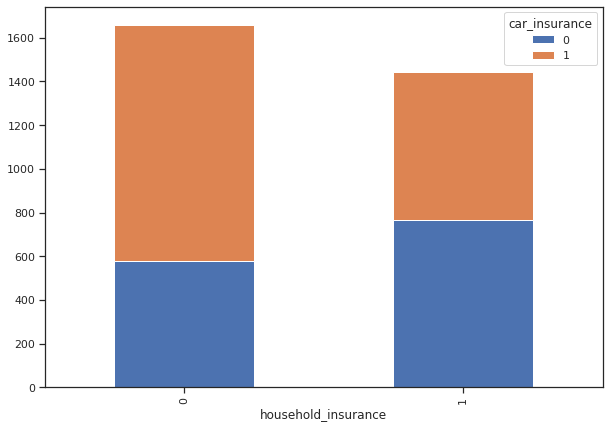

In [181]:
house_car = len(df.loc[(df.household_insurance == 1) & (df.car_insurance==1)]) 
house_nocar = len(df.loc[(df.household_insurance == 1) & (df.car_insurance==0)]) 
nohouse_car = len(df.loc[(df.household_insurance == 0) & (df.car_insurance==1)]) 
nohouse_nocar = len(df.loc[(df.household_insurance == 0) & (df.car_insurance==0)]) 
values = [house_car, house_nocar, nohouse_car, nohouse_nocar]
educations = [1, 1, 0, 0]
insurance = [1, 0, 1, 0]
rows = zip(educations, insurance, values)
columns = ["household_insurance", "car_insurance", "counts"]
df_edu = pd.DataFrame(rows,columns=columns)
df_edu_pivot = df_edu.pivot(index="household_insurance",columns="car_insurance", values="counts")
# why does this work haha?  why do I need to use loc to be able to get the bar graph to work??? 
df_edu_pivot.loc[:, [0,1]].plot(kind="bar", stacked=True, figsize=(10,7))
plt.show()

## car_loan

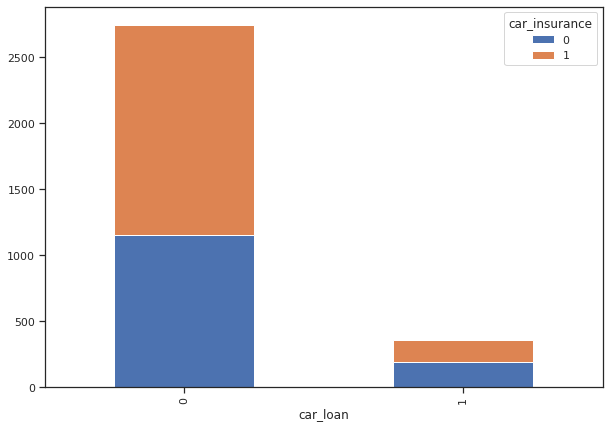

In [182]:
car_car = len(df.loc[(df.car_loan == 1) & (df.car_insurance==1)]) 
car_nocar = len(df.loc[(df.car_loan == 1) & (df.car_insurance==0)]) 
nocar_car = len(df.loc[(df.car_loan == 0) & (df.car_insurance==1)]) 
nocar_nocar = len(df.loc[(df.car_loan == 0) & (df.car_insurance==0)]) 
values = [car_car, car_nocar, nocar_car, nocar_nocar]
educations = [1, 1, 0, 0]
insurance = [1, 0, 1, 0]
rows = zip(educations, insurance, values)
columns = ["car_loan", "car_insurance", "counts"]
df_edu = pd.DataFrame(rows,columns=columns)
df_edu_pivot = df_edu.pivot(index="car_loan",columns="car_insurance", values="counts")
# why does this work haha?  why do I need to use loc to be able to get the bar graph to work??? 
df_edu_pivot.loc[:, [0,1]].plot(kind="bar", stacked=True, figsize=(10,7))
plt.show()

## Create a series from a multi-column dataframe

In [183]:
# First I want to drop all the nans
df1 = df[df["Outcome"].notna()]
# Convert to a series
outcome_series = df1["Outcome"].squeeze()
outcome_counts = outcome_series.value_counts()
print(outcome_counts)
# plt.show()

failure    309
success    299
other      143
Name: Outcome, dtype: int64


## Remove rows based on conditional statements for column

In [184]:
df_success = df[df["Outcome"] == "success"]
df_failure = df[df["Outcome"] == "failure"]
df_other = df[df["Outcome"] == "other"]
df_nan = df[df["Outcome"].isna()]

## Create Pie charts from series

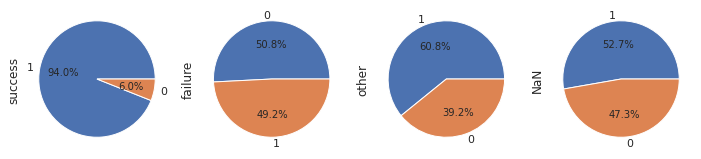

In [185]:
s_success = df_success["car_insurance"].squeeze()
s_failure = df_failure["car_insurance"].squeeze()
s_other = df_other["car_insurance"].squeeze()
s_nan = df_nan["car_insurance"].squeeze()
s_success_counts = s_success.value_counts()
s_failure_counts = s_failure.value_counts()
s_other_counts = s_other.value_counts()
s_nan_counts = s_nan.value_counts()
fig, ax = plt.subplots(ncols=4, figsize=(12,12))
pie_success = s_success_counts.plot(kind="pie", label="success", ax=ax[0], autopct='%1.1f%%')
pie_failure = s_failure_counts.plot(kind="pie", label="failure", ax=ax[1], autopct='%1.1f%%')
pie_other = s_other_counts.plot(kind="pie", label="other", ax=ax[2], autopct='%1.1f%%')
pie_nan = s_nan_counts.plot(kind="pie", label="NaN", ax=ax[3], autopct='%1.1f%%')
plt.show()

## More Pie Charts for education levels


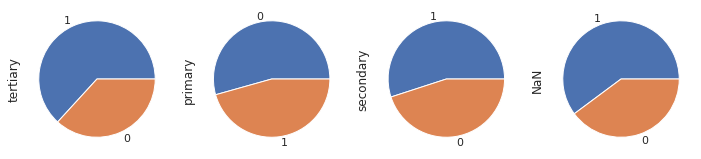

In [186]:
df_tertiary = df[df["education_level"] == "tertiary"] 
df_primary = df[df["education_level"] == "primary"] 
df_secondary = df[df["education_level"] == "secondary"] 
df_nan = df[df["education_level"].isna()] 
s_tertiary = df_tertiary["car_insurance"].squeeze()
s_primary = df_primary["car_insurance"].squeeze()
s_secondary = df_secondary["car_insurance"].squeeze()
s_nan = df_nan["car_insurance"].squeeze()
s_tertiary_counts = s_tertiary.value_counts()
s_primary_counts = s_primary.value_counts()
s_secondary_counts = s_secondary.value_counts()
s_nan_counts = s_nan.value_counts()
fig, ax = plt.subplots(ncols=4, figsize=(12,12))
pie_tertiary = s_tertiary_counts.plot(kind="pie", label="tertiary", ax=ax[0])
pie_primary = s_primary_counts.plot(kind="pie", label="primary", ax=ax[1])
pie_secondary = s_secondary_counts.plot(kind="pie", label="secondary", ax=ax[2])
pie_nan = s_nan_counts.plot(kind="pie", label="NaN", ax=ax[3])
plt.show()

## Analyze relationship between balance amount and purchase car insurance in current campaign

# Data Cleaning and Data Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
df_train = df
df_train.loc[(df.marital_status=="married"), "marital_status"] = 1
df_train.loc[(df.marital_status=="single"), "marital_status"] = 0
df_train.loc[(df.marital_status=="divorced"), "marital_status"] = -1
df_train.loc[(df.education_level=="tertiary"), "education_level"] = 1
df_train.loc[(df.education_level=="secondary"), "education_level"] = 0
df_train.loc[(df.education_level=="primary"), "education_level"] = -1
df_train.loc[(df.Outcome=="success"), "Outcome"] = 1
df_train.loc[(df.Outcome=="other") | (df.Outcome.isna()), "Outcome"] = 0
df_train.loc[(df.Outcome=="failure"), "Outcome"] = -1
df_train.dropna(inplace=True)
y_train = np.array(df_train["car_insurance"])
X_train = np.array(df_train.drop(columns=["car_insurance", "job_type"]))

## Random Sampling

In [34]:
rows = df_train.sample(frac=.005)
rows

,age,job_type,marital_status,education_level,balance_amt,household_insurance,car_loan,Outcome,car_insurance
885,58.000000,unemployed,-1,0,729.000000,0,1,0,0
98,43.000000,blue-collar,1,0,1335.000000,1,0,0,0
1356,49.000000,blue-collar,1,-1,518.000000,1,0,0,0
521,49.726020,technician,1,0,2213.273847,1,0,0,1
722,39.432558,management,1,1,881.321176,1,0,0,1
2308,32.000000,services,0,0,936.000000,1,0,0,0
2358,36.000000,services,0,0,62.000000,1,0,0,0
499,36.000000,management,1,1,322.000000,1,0,0,0
800,28.000000,admin.,0,1,832.000000,0,0,-1,1
748,56.000000,technician,0,0,1437.000000,1,0,0,0


In [47]:
# spot check the algorithms
models = []
models.append(("LR", LogisticRegression(solver="liblinear", multi_class="ovr")))
# models.append(("LDA", LinearDiscriminantAnalysis()))
# models.append(("KNN", KNeighborsClassifier()))
# models.append(("CART", DecisionTreeClassifier()))
# models.append(("NB", GaussianNB()))
# models.append(("SVM", SVC(gamma="auto")))
# Evaluate each model in turn
results = []
names = []
lst_stratified = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    for train_index, test_index in kfold.split(X_train,y_train):
        x2, x3 = X_train[train_index], X_train[test_index]
        y2, y3 = y_train[train_index], y_train[test_index]
        cntYes = len([x for x in y2 if x==1])
        cntNo = len([x for x in y2 if x==0])
        cntYesTest = len([x for x in y3 if x==1])
        cntNoTest = len([x for x in y3 if x==0])
        print(f"The number who bought car insurance in train dataset {cntYes}, the number who didn't buy {cntNo}, the number that bought in test dataset {cntYesTest}, the number that didn't buy {cntNoTest}")
        model.fit(x2,y2)
        lst_stratified.append(model.score(x3, y3))
    print("list of possible accuracies", lst_stratified)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
#     results.append(cv_results)
#     print(results)
#     names.append(name)
#     print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
#     # compare algorithms
#     plt.boxplot(results, labels=names)
#     plt.title("Algorithm Comparison")
#     plt.show()

The number who bought car insurance in train dataset 1352, the number who didn't buy 1032, the number that bought in test dataset 338, the number that didn't buy 259
The number who bought car insurance in train dataset 1352, the number who didn't buy 1033, the number that bought in test dataset 338, the number that didn't buy 258
The number who bought car insurance in train dataset 1352, the number who didn't buy 1033, the number that bought in test dataset 338, the number that didn't buy 258
The number who bought car insurance in train dataset 1352, the number who didn't buy 1033, the number that bought in test dataset 338, the number that didn't buy 258
The number who bought car insurance in train dataset 1352, the number who didn't buy 1033, the number that bought in test dataset 338, the number that didn't buy 258
list of possible accuracies [0.5912897822445561, 0.5771812080536913, 0.6308724832214765, 0.5838926174496645, 0.6057046979865772]


In [ ]:
# spot check the algorithms
models = []
models.append(("LR", LogisticRegression(solver="liblinear", multi_class="ovr")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma="auto")))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
# compare algorithms
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.show()

## drop the outcome

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
df_train = df
df_train.loc[(df.marital_status=="married"), "marital_status"] = 1
df_train.loc[(df.marital_status=="single"), "marital_status"] = 0
df_train.loc[(df.marital_status=="divorced"), "marital_status"] = -1
df_train.loc[(df.education_level=="tertiary"), "education_level"] = 1
df_train.loc[(df.education_level=="secondary"), "education_level"] = 0
df_train.loc[(df.education_level=="primary"), "education_level"] = -1
df_train.dropna(inplace=True)
y_train = np.array(df_train["car_insurance"])
X_train = np.array(df_train.drop(columns=["car_insurance", "job_type", "Outcome"]))

LR: 0.5991343743325127 (0.02169627181689867)
LDA: 0.5984643575820938 (0.02081912171592084)
KNN: 0.5628966982563826 (0.008991680918776246)
CART: 0.63166335030859 (0.006711886876929355)
NB: 0.5967881915168685 (0.022131988162477325)
SVM: 0.6269659258259981 (0.007987877933046795)
SVMscale: 0.5689375288073477 (0.002643906412968658)


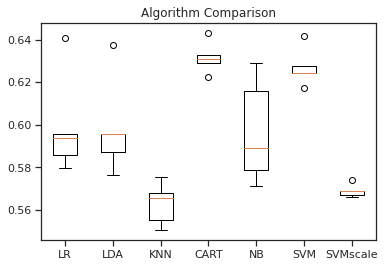

In [133]:
# spot check the algorithms
models = []
models.append(("LR", LogisticRegression(solver="liblinear", multi_class="ovr")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma="auto")))
models.append(("SVMscale", SVC(gamma="scale")))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
# compare algorithms
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.show()

[array([0.57956449, 0.59563758, 0.6409396 , 0.58557047, 0.59395973])]
liblinear: 0.5991343743325127 (0.02169627181689867)
[array([0.57956449, 0.59563758, 0.6409396 , 0.58557047, 0.59395973]), array([0.57621441, 0.59563758, 0.64261745, 0.58557047, 0.59563758])]
newton-cg: 0.5991354985216912 (0.0229108594542482)
[array([0.57956449, 0.59563758, 0.6409396 , 0.58557047, 0.59395973]), array([0.57621441, 0.59563758, 0.64261745, 0.58557047, 0.59563758]), array([0.57453936, 0.56543624, 0.63758389, 0.59060403, 0.60067114])]
libfgs: 0.5937669330995019 (0.02509950404615425)


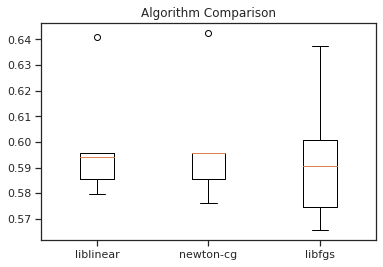

In [124]:
# spot check the algorithms
models = []
models.append(("liblinear", LogisticRegression(solver="liblinear")))
models.append(("newton-cg", LogisticRegression(solver="newton-cg")))
models.append(("libfgs", LogisticRegression(solver="lbfgs")))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    print(results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
# compare algorithms
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.show()

## Dropping more columns

In [251]:
df_origin=df
df=df_origin
df_train = df.drop(columns=["job_type", "car_loan", "balance_amt","marital_status", "education_level"])
# df_train.loc[(df.education_level=="tertiary"), "education_level"] = 1
# df_train.loc[(df.education_level=="secondary"), "education_level"] = 0
# df_train.loc[(df.education_level=="primary"), "education_level"] = -1
df_train.loc[(df.Outcome=="success"), "Outcome"] = 1
df_train.loc[(df.Outcome=="other") | (df.Outcome.isna()), "Outcome"] = 0
df_train.loc[(df.Outcome=="failure"), "Outcome"] = -1
# df_train.dropna(inplace=True)
y_train = np.array(df_train["car_insurance"])
X_train = np.array(df_train.drop(columns=["car_insurance"]))
df_train.head()

,age,household_insurance,Outcome,car_insurance
0,47.000000,1,0,0
1,46.031442,0,0,1
2,36.000000,1,0,1
3,32.000000,0,0,1
4,30.000000,1,-1,1


LR: 0.5963872006649005 (0.020130778465468457)
LDA: 0.5960651394732741 (0.01968153055621073)
KNN: 0.6121765103111526 (0.025029989690357354)
CART: 0.658927847904005 (0.010637706119723606)
NB: 0.5892935431925614 (0.01868699609665754)
SVM: 0.5773736429276402 (0.012138094502537552)
SVMscale: 0.5673762401953145 (0.00044788342915158644)


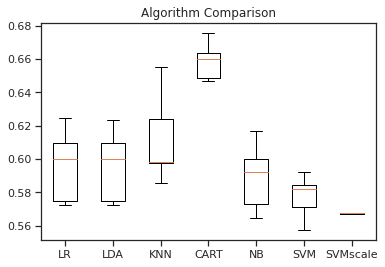

In [245]:
# spot check the algorithms
models = []
models.append(("LR", LogisticRegression(solver="liblinear")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma="auto")))
models.append(("SVMscale", SVC(gamma="scale")))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
# compare algorithms
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.show()

## Machine learning with duration and df_calls

In [327]:

df_calls.loc[(df.Outcome=="success"), "Outcome"] = 1
df_calls.loc[(df.Outcome=="other") | (df.Outcome.isna()), "Outcome"] = 0
df_calls.loc[(df.Outcome=="failure"), "Outcome"] = -1
y_train = np.array(df_calls["car_insurance"])
X_train = np.array(df_calls.drop(columns=["car_insurance"]))

,age,household_insurance,Outcome,duration,car_insurance
0,47.000000,1,0,129,0
1,46.031442,0,0,17598,1
2,36.000000,1,0,515,1
3,32.000000,0,0,750,1
4,30.000000,1,-1,884,1


LR: 0.7736953924471457 (0.008603236020384139)
LDA: 0.6602192093917199 (0.013872617229321317)
KNN: 0.7827281699651966 (0.017403163564987015)
CART: 0.8010918913303205 (0.014715585666508076)
NB: 0.6831094488597994 (0.012871499236819007)
SVM: 0.754997662459093 (0.00439236510970771)
SVMscale: 0.7201870032725572 (0.015419114248987592)


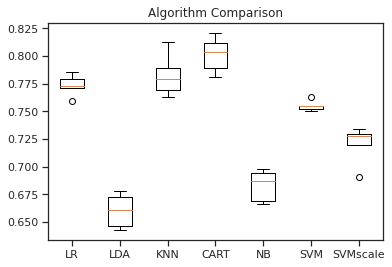

In [328]:
# spot check the algorithms
models = []
models.append(("LR", LogisticRegression(solver="liblinear")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma="auto")))
models.append(("SVMscale", SVC(gamma="scale")))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
# compare algorithms
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.show()

# Prediction for Test Dataset

In [329]:
df_test = pd.read_csv("/data/projects/car-insurance/data/Test_data.csv")
print(f"The number of entries in test dataset={len(df_test)}")

The number of entries in test dataset=935


In [330]:
df_test = df_test.drop(columns = ["communication", "last_contact_day", "last_contact_month", "days_passed", "call_start", "call_end", "no_of_contacts", "prev_attempts", "default_or_not", "job_type", "car_loan", "balance_amt","marital_status", "education_level"])
df_test.head()

,age,household_insurance,Outcome
0,65.000000,0,NaN
1,36.000000,1,NaN
2,37.000000,0,success
3,30.065066,0,NaN
4,41.000000,1,NaN


In [254]:
# df_test.loc[(df_test.marital_status=="married"), "marital_status"] = 1
# df_test.loc[(df_test.marital_status=="single"), "marital_status"] = 0
# df_test.loc[(df_test.marital_status=="divorced"), "marital_status"] = -1
# df_test.loc[(df_test.education_level=="tertiary"), "education_level"] = 1
# df_test.loc[(df_test.education_level=="secondary"), "education_level"] = 0
# df_test.loc[(df_test.education_level=="primary") | (df_test.education_level.isna()), "education_level"] = -1
df_test.loc[(df_test.Outcome=="success"), "Outcome"] = 1
df_test.loc[(df_test.Outcome=="other") | (df_test.Outcome.isna()), "Outcome"] = 0
df_test.loc[(df_test.Outcome=="failure"), "Outcome"] = -1
# X_test = np.array(df_test)[:,:6]
# outcomes = np.array(df_test)[:,6]
X_test = np.array(df_test)
outcomes = np.array(df_test)[:,2]

In [255]:
lr=LogisticRegression(random_state=0, solver="liblinear")
lr.fit(X_train,y_train)
coef = lr.coef_[0]
print(coef)
target = lr.predict(X_test)

[ 0.00087972 -0.6386845   0.85686933]


In [256]:
with open("/data/projects/car-insurance/data/prediction_results_logistic_regression2.csv", "w") as csv_file:
    fieldnames = ["prediction"]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for i, pred in enumerate(target):
        writer.writerow({"prediction": str(pred)})
#         if outcomes[i]==1:
#             writer.writerow({"prediction": str(1)})
#         else:
#             writer.writerow({"prediction": str(pred)})

## Using a CART (classification and regression tree)

In [364]:
df_test = createDataFrame('Test_data.csv')
X_test = np.array(df_test)
df_train = createDataFrame('Train_data.csv')
X_train, y_train = np.array(df_train.drop(columns = 'car_insurance')), np.array(df_train.car_insurance)
outcomes = np.array(df_test)[:,2]
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.class_weight
print(f"weights/coefficients = {coef}")
target = dtc.predict(X_test)

weights/coefficients = [ 0.00087972 -0.6386845   0.85686933]


### Save the predictions to file

In [250]:
savePredictionsv1(target, 'prediction_results_final1')
savePredictionsv2(target, 'prediction_results_final2')

## Using SVM

In [139]:
svm = SVC(gamma="auto")
svm.fit(X_train,y_train)
target = svm.predict(X_test)

In [140]:
with open("/data/projects/car-insurance/data/prediction_results_svm.csv", "w") as csv_file:
    fieldnames = ["prediction"]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for i, pred in enumerate(target):
        if outcomes[i]==1:
            writer.writerow({"prediction": str(1)})
        else:
            writer.writerow({"prediction": str(pred)})

In [115]:
# This is a basic algorithm to test submissions and formatting of submissions
target = []
def rand50():
    return random.choice([0,1])
def rand75():
    return rand50() | rand50()
for _, row in df_test.iterrows():
    if row["Outcome"]!="success":
        target.append(rand50())
    else:
        target.append(1)

## Save data to a csv file 

In [128]:
with open("/data/projects/car-insurance/data/prediction_results.csv", "w") as csv_file:
    fieldnames = ["prediction"]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for pred in target:
        writer.writerow({"prediction": str(pred)})


In [ ]:
# res = pd.DataFrame(predictions)
# res.index = test_new.index
# res.columns = ["prediction"]
# res.to_csv("prediction_results.csv", index=False)